In [4]:
# This function shows the location of one channel on head.
#
# INPUTS:
#   chanVal is a vector with the weight of the channels to be plotted.

import numpy as np
import scipy.io
import scipy.interpolate
import matplotlib.pyplot as plt

In [13]:
def show_chanWeights(chanVal):
    matlab_offset = 1

    selNum = np.asarray(range(1,306))
    cortIX = np.where(np.mod(selNum, 3)!=0)
    selNum = selNum[cortIX]

    resolution = 200

    # Load sensor location
    #load sensors102.mat
    mat = scipy.io.loadmat('sensors102.mat')
    c102 = mat['c102']
    x = c102[:, 2 - matlab_offset]
    y = c102[:, 3 - matlab_offset]
    xlin = np.linspace(min(x), max(x) + 35, resolution)
    ylin = np.linspace(min(y), max(y), resolution)
    r = 5

    MinChanVal = min(chanVal)
    z = np.ones(len(x)) * MinChanVal

    selSen = np.ceil(selNum / 3)

    maxSen = int(max(selSen))
    for senIX in range(1, maxSen):
        currVal = np.zeros(2)
        for chanIX in range(1, 2):
            chanInd = (senIX - 1) * 3 + chanIX
            tmp = np.where(selNum == chanInd)
            if len(tmp) != 0:
                currVal[chanIX - matlab_offset] = chanVal[tmp]
        z[senIX] = max(currVal)

    X, Y = np.meshgrid(xlin, ylin)
    Z = scipy.interpolate.griddata((x, y), z, (X, Y), method='cubic')
#     fig, axs = plt.subplots(1, 1)
#     ax = axs[0]
#     pcm = plt.pcolor([X, Y], Z)
#     ax.axis('equal')
    plt.pcolor(Z)
    plt.axis('equal')  
    ### set(gca, 'Color', 'w')
    plt.axis('off')
    ### shading interp
    plt.colorbar()
    plt.figure(figsize=(120,120))
    plt.show()

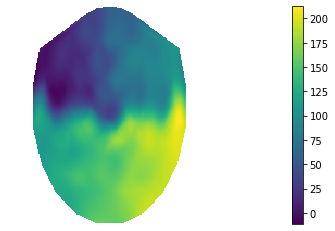

<Figure size 8640x8640 with 0 Axes>

In [14]:
chanVal = np.asarray(range(1,306))
show_chanWeights(chanVal)